<br>
<br>
<div style="text-align: center;">
<h1>A Comparison of Different Machine Learning Classifiers to Predict if Banking Clients will Subscribe to a Term Deposit </h1>

<br>
<br>
<br>
Daniel Arday, Albert Chen
<br>
<br>
<br>
<br>
</div>

# Introduction

The UCI Bank Marketing dataset (https://archive.ics.uci.edu/dataset/222/bank+marketing) is a collection of anonymized marketing data based phone calls initiated from a Portuguese banking institution. Multiple contacts to the same client was often required to access if a client would subscribe to a bank term deposit (Sérgio Moro, P. Cortez, P. Rita. 2014).


### Objective

**Our classification goal with this dataset is to predict if banking clients will subscribe to a term deposit.**

### Data Description/Attribuite Information
   1. `age`: age demographic
   2. `job`: employment type
   3. `martial`: martial status
   4. `education`: categorical education status
   5. `default`: credit default
   6. `balance`: average yearly balance
   7. `housing`: housing loan status
   8. `loan`: personal loan status
   9. `contact`: contact communication type
   10. `day`: last contact day of the week
   11. `month`: last contact month
   12. `duration`: last contact duration in seconds
   13. `campaign`: number of repeated contacts with client
   14. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (-1 not previously contacted)
   15. `previous`: 	number of contacts performed before this campaign and for this client
   16. `poutcome`: outcome of the previous marketing campaign
   17. `y`: is client subscribed to term deposit

### Loading libraries and data

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('data/bank.csv', sep=';')
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


### Data Preparation

In [4]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
#Let's make a copy of the data
df = data.copy()

In [6]:
# Are there any duplicate rows in the data. - Nope!
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Exploratory Data Analysis

In [29]:
# Function to generate a bar chart with annotations
def annotated_barchart(dataset, attribute, show_percentage=False, limit=None):
    attribute_length = len(dataset[attribute])  # Total number of entries for the attribute
    unique_count = dataset[attribute].nunique()  # Count of unique values
    chart_width = limit + 1 if limit is not None else unique_count + 1
    plt.figure(figsize=(chart_width, 5))
    plt.xticks(rotation=90, fontsize=15)
    chart = sns.countplot(
        data=dataset,
        x=attribute,
        palette="Set2",
        order=dataset[attribute].value_counts().index[:limit].sort_values(),
    )

    for bar in chart.patches:
        label_text = "{:.1f}%".format(100 * bar.get_height() / attribute_length) if show_percentage else bar.get_height()
        label_x = bar.get_x() + bar.get_width() / 2
        label_y = bar.get_height()
        chart.annotate(
            label_text,
            (label_x, label_y),
            ha="center",
            va="center",
            fontsize=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()

    
# Function to display both a boxplot and histogram for a given data feature
def box_and_hist_plot(dataset, column, fig_size=(12, 7), density_curve=False, hist_bins=None):
    """
    This function plots a boxplot and a histogram for a given dataset feature.

    dataset: Pandas DataFrame
    column: Column in the DataFrame
    fig_size: Size of the figure (default is (12,7))
    density_curve: Boolean to indicate if KDE should be shown (default is False)
    hist_bins: Number of bins for histogram (default is None)
    """
    fig, (box_axis, hist_axis) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=fig_size,
    )
    sns.boxplot(
        data=dataset, x=column, ax=box_axis, showmeans=True, color="skyblue"
    )
    sns.histplot(
        data=dataset, x=column, kde=density_curve, ax=hist_axis, bins=hist_bins, color="lightgreen"
    ) if hist_bins else sns.histplot(
        data=dataset, x=column, kde=density_curve, ax=hist_axis, color="lightgreen"
    )
    hist_axis.axvline(
        dataset[column].mean(), color="blue", linestyle="--"
    )
    hist_axis.axvline(
        dataset[column].median(), color="red", linestyle="-"
    )
    
    
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    #print(tab1)
    #print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index")#.sort_values(
        #by=sorter, ascending=False
    #)
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

## Univariate Analysis

Here before building our model we looked for the general trends in the data. We decided to produce several charts...

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Observations on Term Deposit Subscription

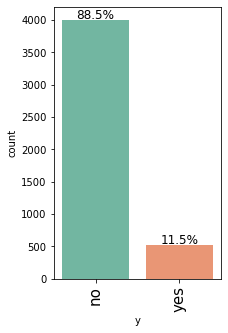

In [26]:
#y = yes they are subscribed
annotated_barchart(df,"y",True)

### Observations on Age


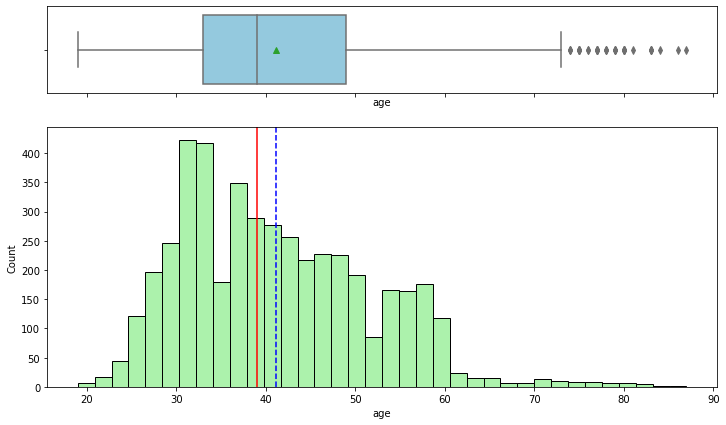

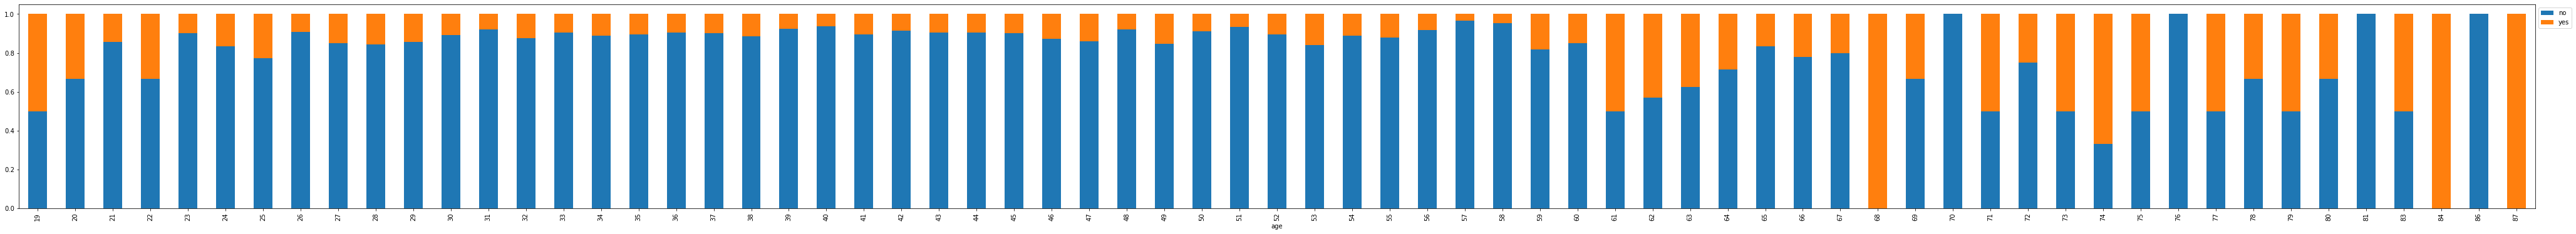

In [30]:
#Age
cat = "age"
box_and_hist_plot(df, cat)
stacked_barplot(df, cat, "y")

`Age` ranges from 18 to 95 years is normaly distributed but somewhat skewed to the right. We can see that older customers are more likely to have a subscription to a term deposit.

### Observations on Job

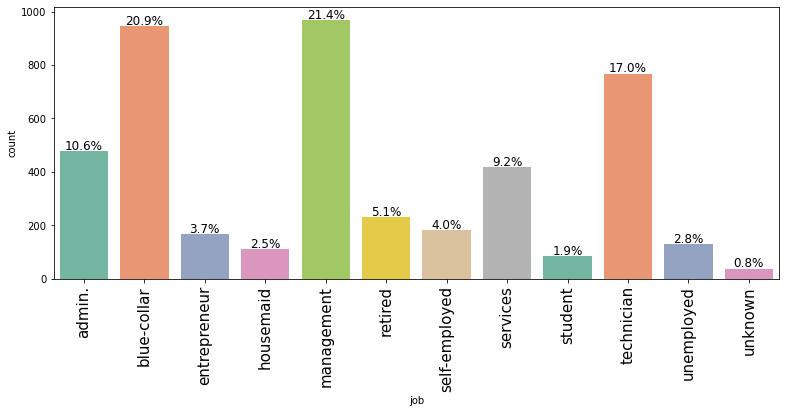

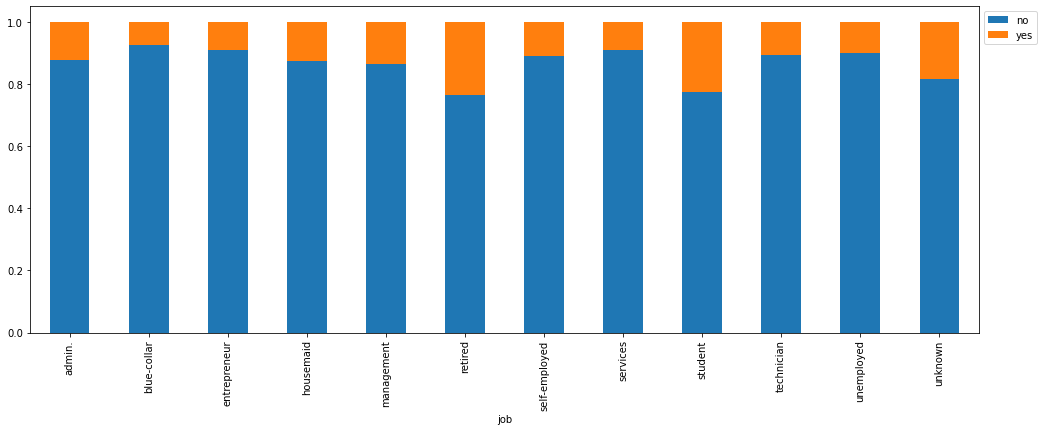

In [31]:
cat = "job"
annotated_barchart(df,cat, True)
stacked_barplot(df, cat, "y")

Comments on job

### Observations on Marital Status

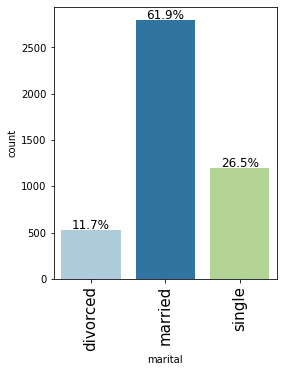

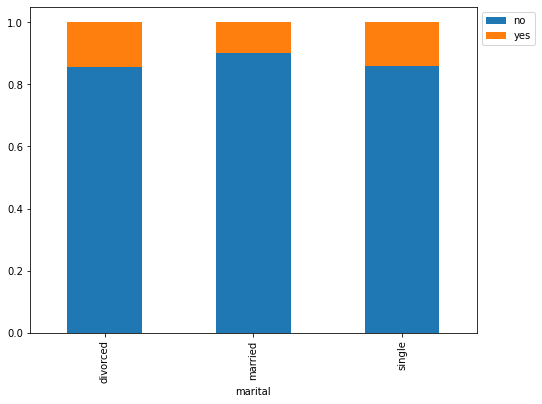

In [12]:
cat = "marital"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

Comments on job

### Observations on Education

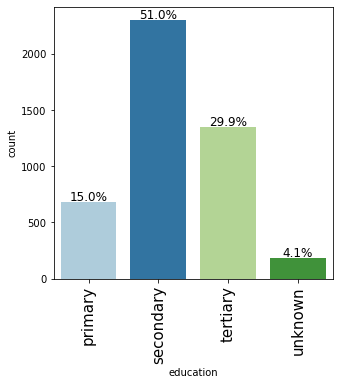

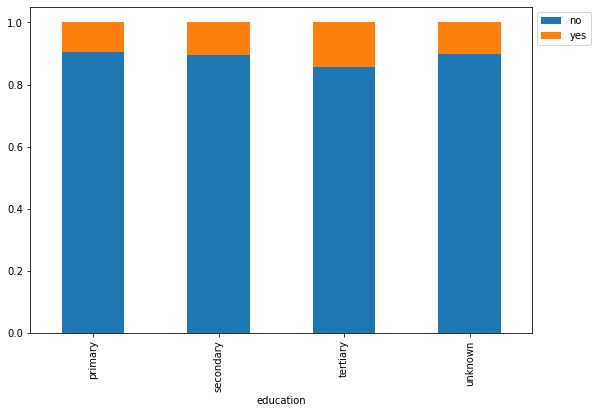

In [13]:
cat = "education"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

Comments on job

### Observations on Default

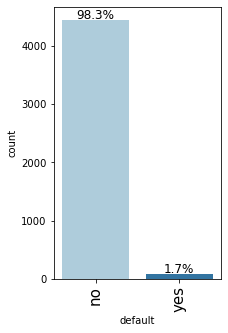

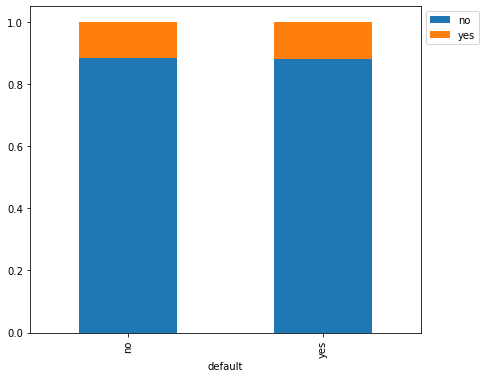

In [14]:
cat = "default"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

Comments on job

### Observations on Balance

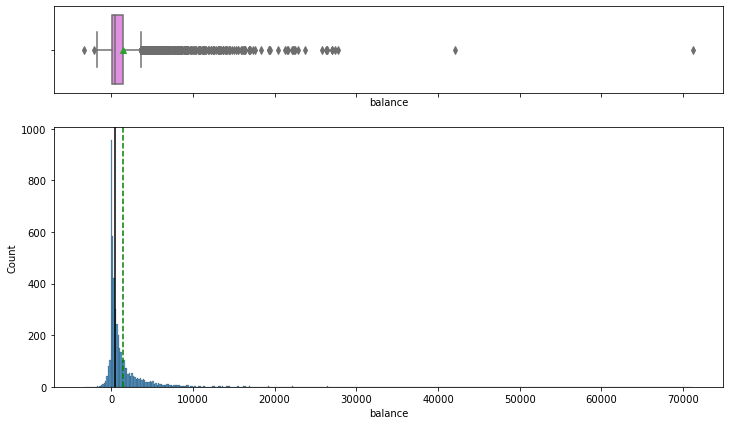

In [15]:
cat = "balance"
histogram_boxplot(df, cat)
# stacked_barplot(df, cat, "y") - Some people have ridiculously high balances

`Balance`

### Observations on Housing

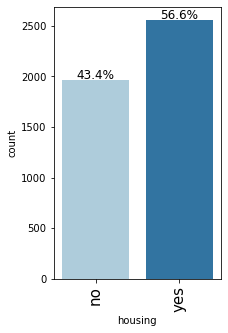

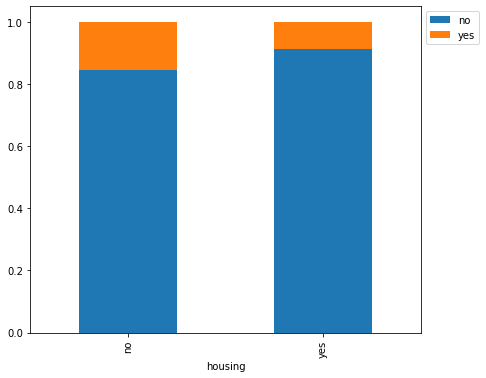

In [16]:
cat = "housing"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`housing`

### Observations on Loan

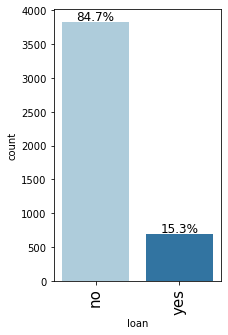

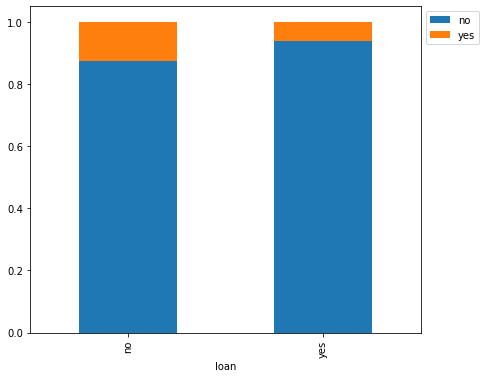

In [17]:
cat = "loan"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`loan`

### Observations on Contact

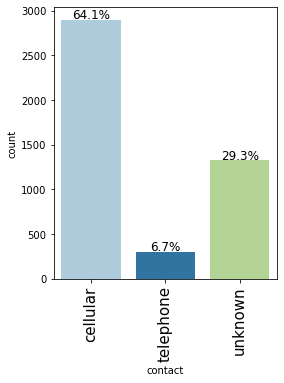

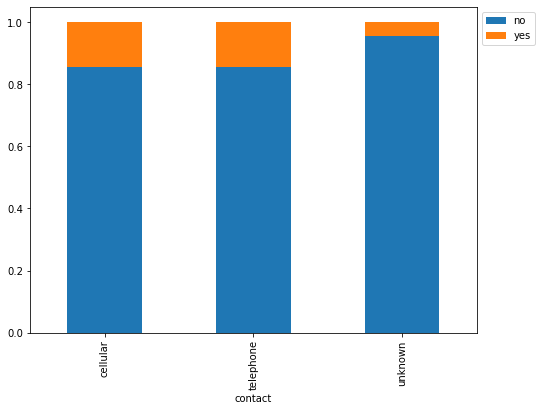

In [18]:
cat = "contact"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`contact`

### Observations on Day

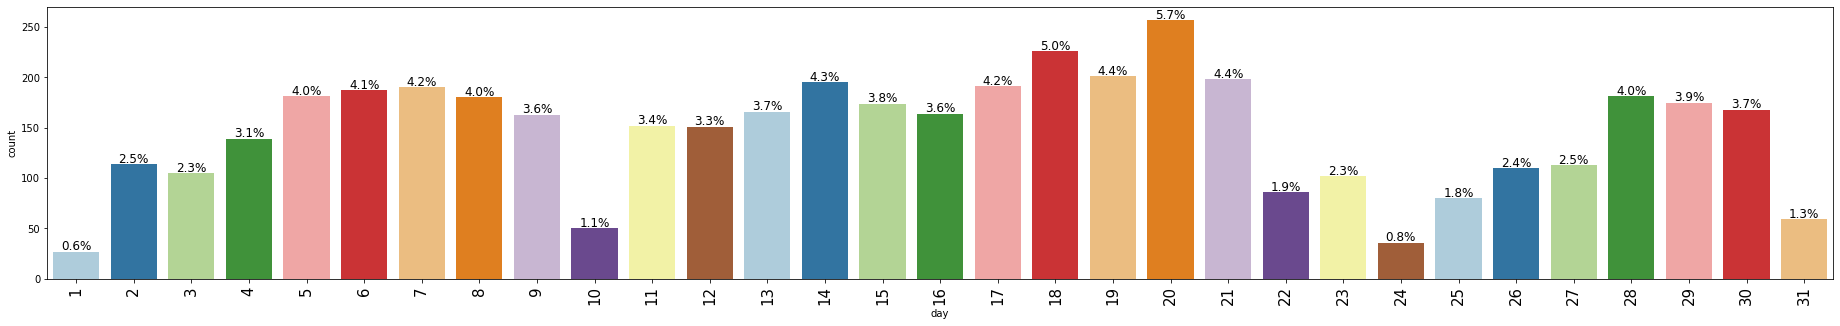

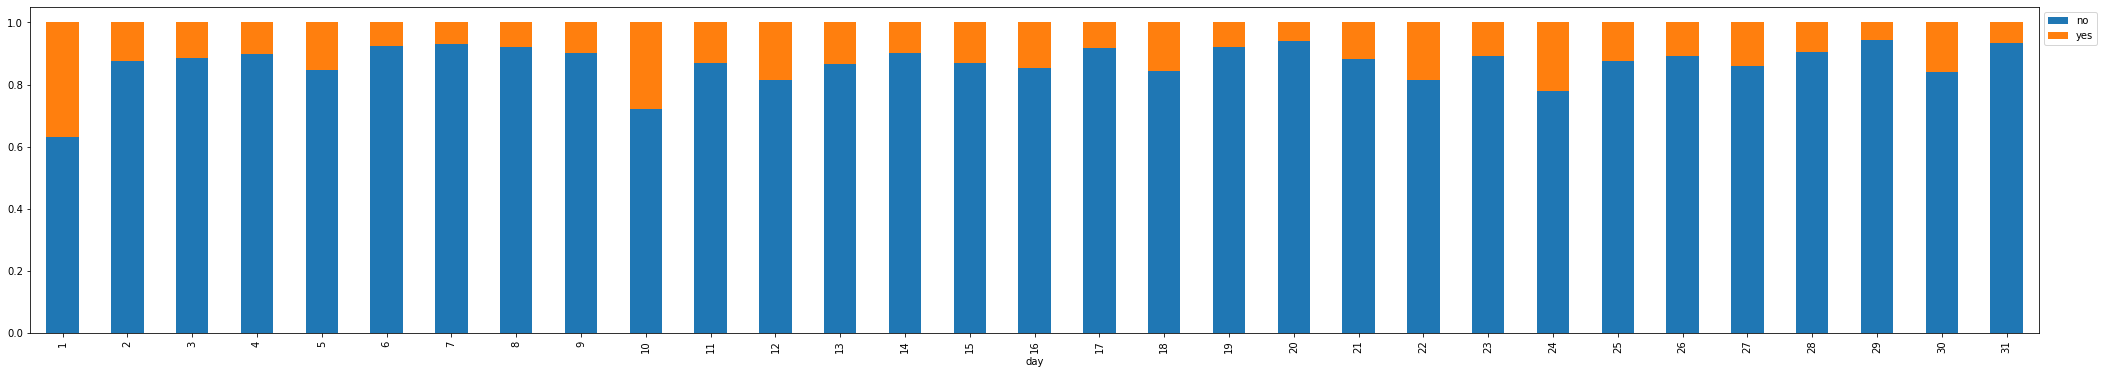

In [19]:
cat = "day"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`day`

### Observations on Month

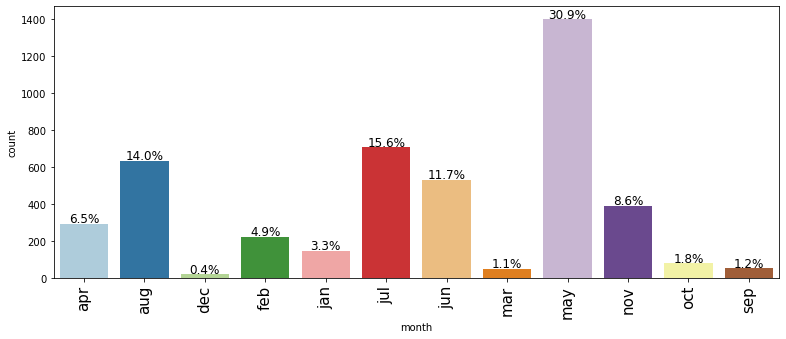

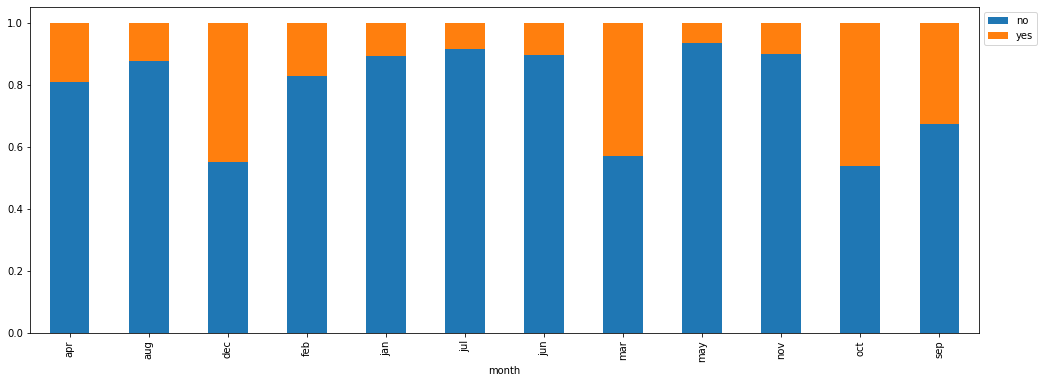

In [20]:
cat = "month"
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`month`

### Observations on Duration

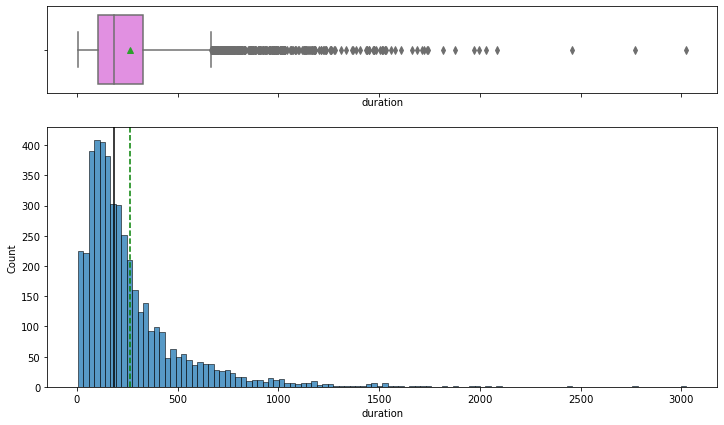

In [21]:
cat = "duration"
histogram_boxplot(df, cat)
# stacked_barplot(df, cat, "y") - so maybe convert this to minutes to be able to see all

`duration`

### Observations on Campaign

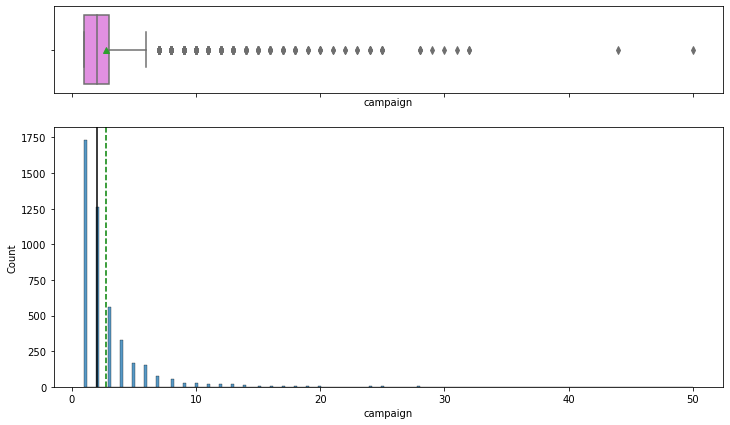

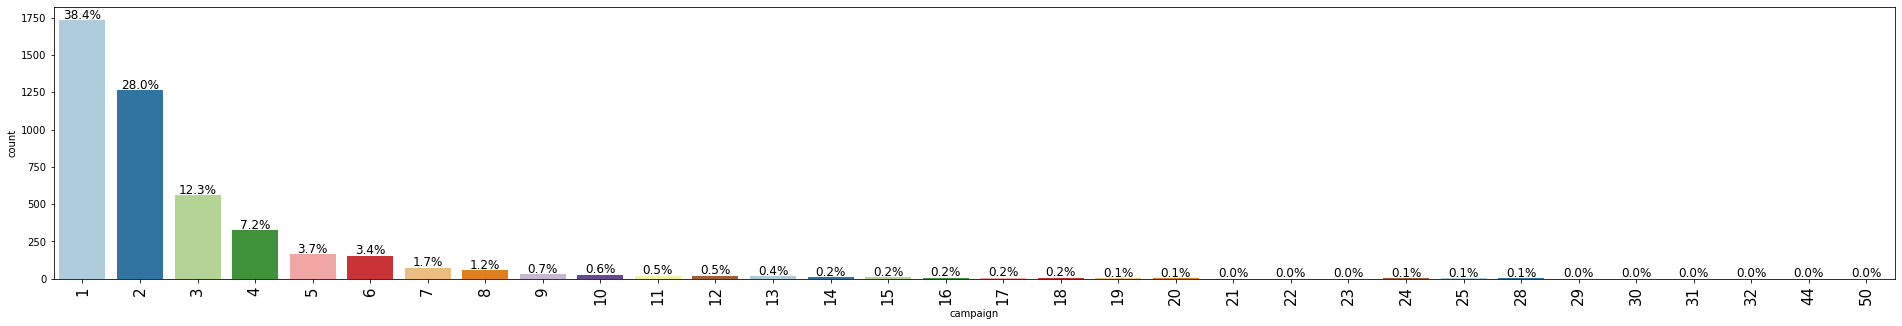

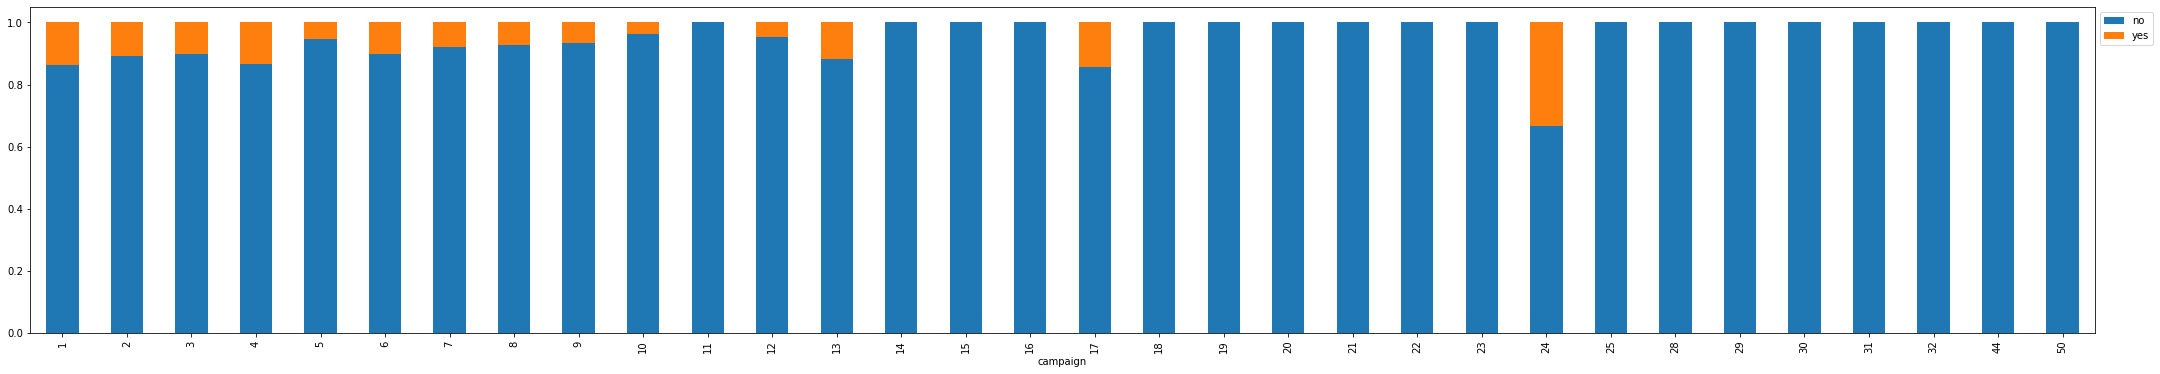

In [22]:
cat = "campaign"
histogram_boxplot(df, cat)
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`campaign`

### Observations on P Days 
(Number days elapsed from a previous a campaign contact)

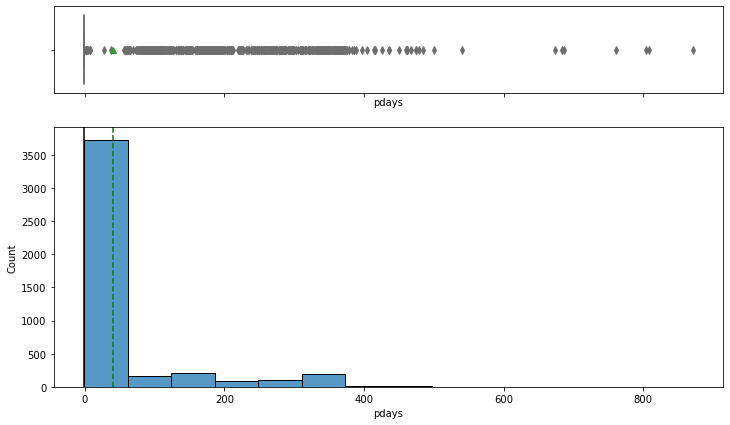

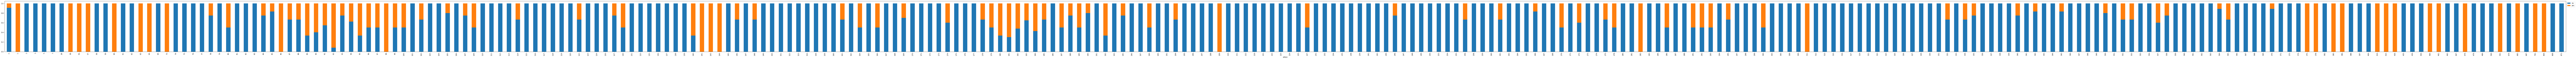

In [23]:
cat = "pdays"
histogram_boxplot(df, cat)
# labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`pdays` need to account for negative ones in this case

### Observations on Previous
Number of concacts before this campaign started

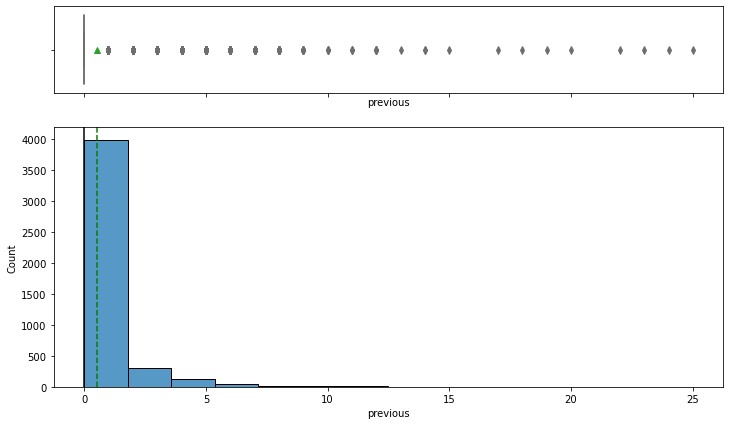

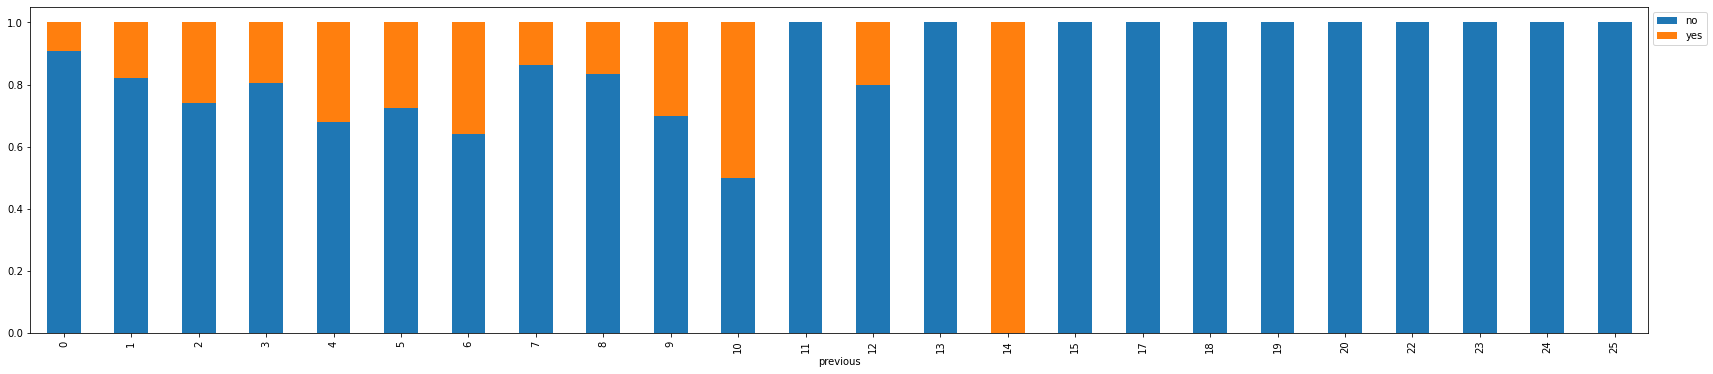

In [24]:
cat = "previous"
histogram_boxplot(df, cat)
# labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`previous` - drop 275

### Observations on PoutCome
The outcome of the previous marketing campaign

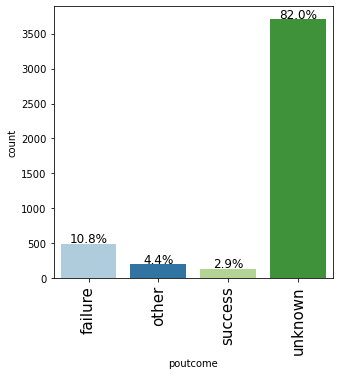

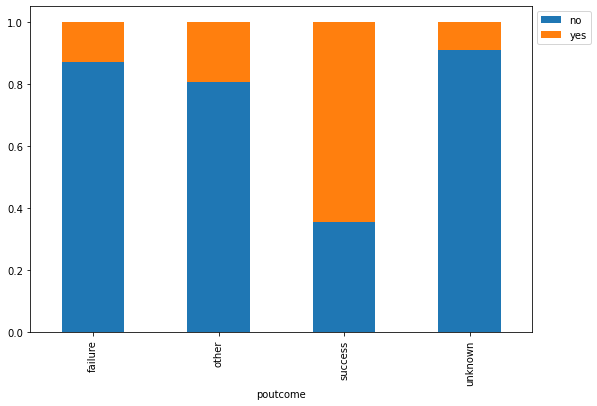

In [25]:
cat = "poutcome"
# histogram_boxplot(df, cat)
labeled_barplot(df,cat,perc=True)
stacked_barplot(df, cat, "y")

`poutcome` - if they were successfully convinced by the previous marketing campaign they were very likely convinced by this one as well.

### Multivariate Analysis

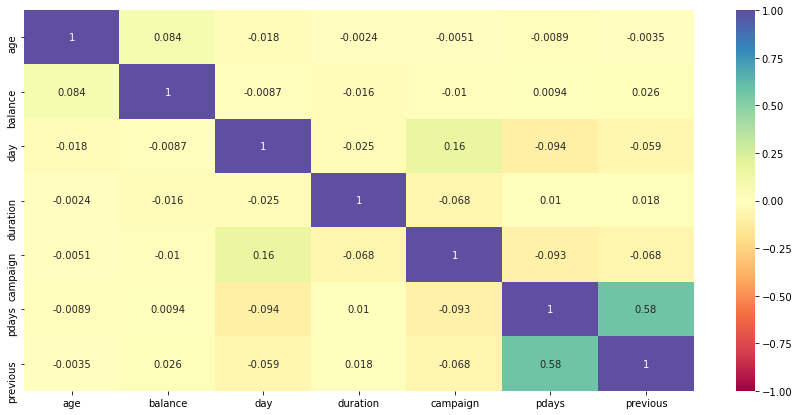

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap="Spectral")
plt.show()

### Conclusions on EDA

Some thots

# Data-Prep

In [27]:
# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

### Split the Data

In [28]:
X = df.drop(['y'], axis=1)
y = df['y']

# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print("Training:", X_train.shape[0], "  Validation:", X_val.shape[0] , "  Test:", X_test.shape[0])

Training: 2712   Validation: 904   Test: 905


### One Hot Encoding

#### Let's see if the following categorical columns can be easily encoded and if there are any values that need to be imputed.

In [29]:
enc_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [30]:
for i in enc_cols:
    print(i, ":", data[i].unique())

job : ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital : ['married' 'single' 'divorced']
education : ['primary' 'secondary' 'tertiary' 'unknown']
default : ['no' 'yes']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['cellular' 'unknown' 'telephone']
month : ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome : ['unknown' 'failure' 'other' 'success']


#### One hot encoding excluding y.

In [31]:
# enc_data = pd.get_dummies(data)
# X_data = enc_data.drop(columns=['y_no', 'y_yes'])
# X_data.head(5)

#### Adding y variable for our classifiers.

In [32]:
# y_data = enc_data[['y_no', 'y_yes']]
# y_data.head(5)

Looks like all the data is well formatted and there is no need imputation

In [33]:
# df_enc = pd.get_dummies(data, enc_cols)
# df_enc.head(5)

In [34]:
X_train = pd.get_dummies(data=X_train, columns=enc_cols, drop_first=True)
X_val = pd.get_dummies(data=X_val, columns=enc_cols, drop_first=True)
X_test = pd.get_dummies(data=X_test, columns=enc_cols, drop_first=True)
y_train = pd.get_dummies(data=y_train, columns=enc_cols, drop_first=True)
y_val = pd.get_dummies(data=y_val, columns=enc_cols, drop_first=True)
y_test = pd.get_dummies(data=y_test, columns=enc_cols, drop_first=True)

We are doing this because using drop_first=True in pd.get_dummies is a good practice to avoid multicollinearity in our features, thereby making the model more stable and interpretable.

# Model-Prep

### Classification

We will be using 3 different types classification methods:

- Decison Tree
- XGBoost
- SVM

(Old 6)
- BaggingClassifier
- Random Forest
- Gradient Boost
- Adaboost
- XGBoost
- DecisionTree

# Classification Implementation

#### Ensemble Classifiers

Ensemble methods aim to improve the accuracy of predictions by combining multiple models to obtain the final result. We will be evaluating 5 ensemble methods for recall, precision, and accuracy. These methods are Bagging, Gradient Boost, Ada Boost, Random Forest, and XGBoost.

As the baseline we have the standard decision tree model. A decision tree is a supervised classification tool that builds a flowchart of nodes to represent each outcome. We can see in the example below starting with the root node the decision tree splits into multiple decision nodes. Eventually each decision node will reach a leaf node in which no more child nodes may be created. As we expand on the decision tree algorithm we can start to see improvements in all 3 performance metrics.

Bagging or bootstrap aggregation is a sampling technique that samples the population set via a replacement procedure. Prediction outcomes are modeled through different decision trees models with weak classifiers can be trained independently in parallel.

Random Forest serves as an extension to the bagging algorithm with feature randomness to create an uncorrelated forest of decision trees. The feature randomness will generate random subset of features to lower decision tree correlation.

Adaboost is a boosting algorithm that trains each decision tree model sequentially. Each new iteration learns from previous the misclassifications of weak classifiers and eventually turns them into strong classifiers.

Gradient Boosting is another boosting algorithm which works similarly to Adaboost. A key difference lies in how weights are handled. The weights of each training instance is not tweaked, instead each classifier predictor is trained with residuals of previous iterations as labels.

XGboost or Extreme Gradient Boosting is an optimized implemenation of Graident Boosting with NaN handling features. The block structure of this method allows for parallel learning on multi core CPUs which can significantly boost processing speeds.

# Model Construction & Evaluation

## Decision Tree

Accuracy: 0.8939226519337017


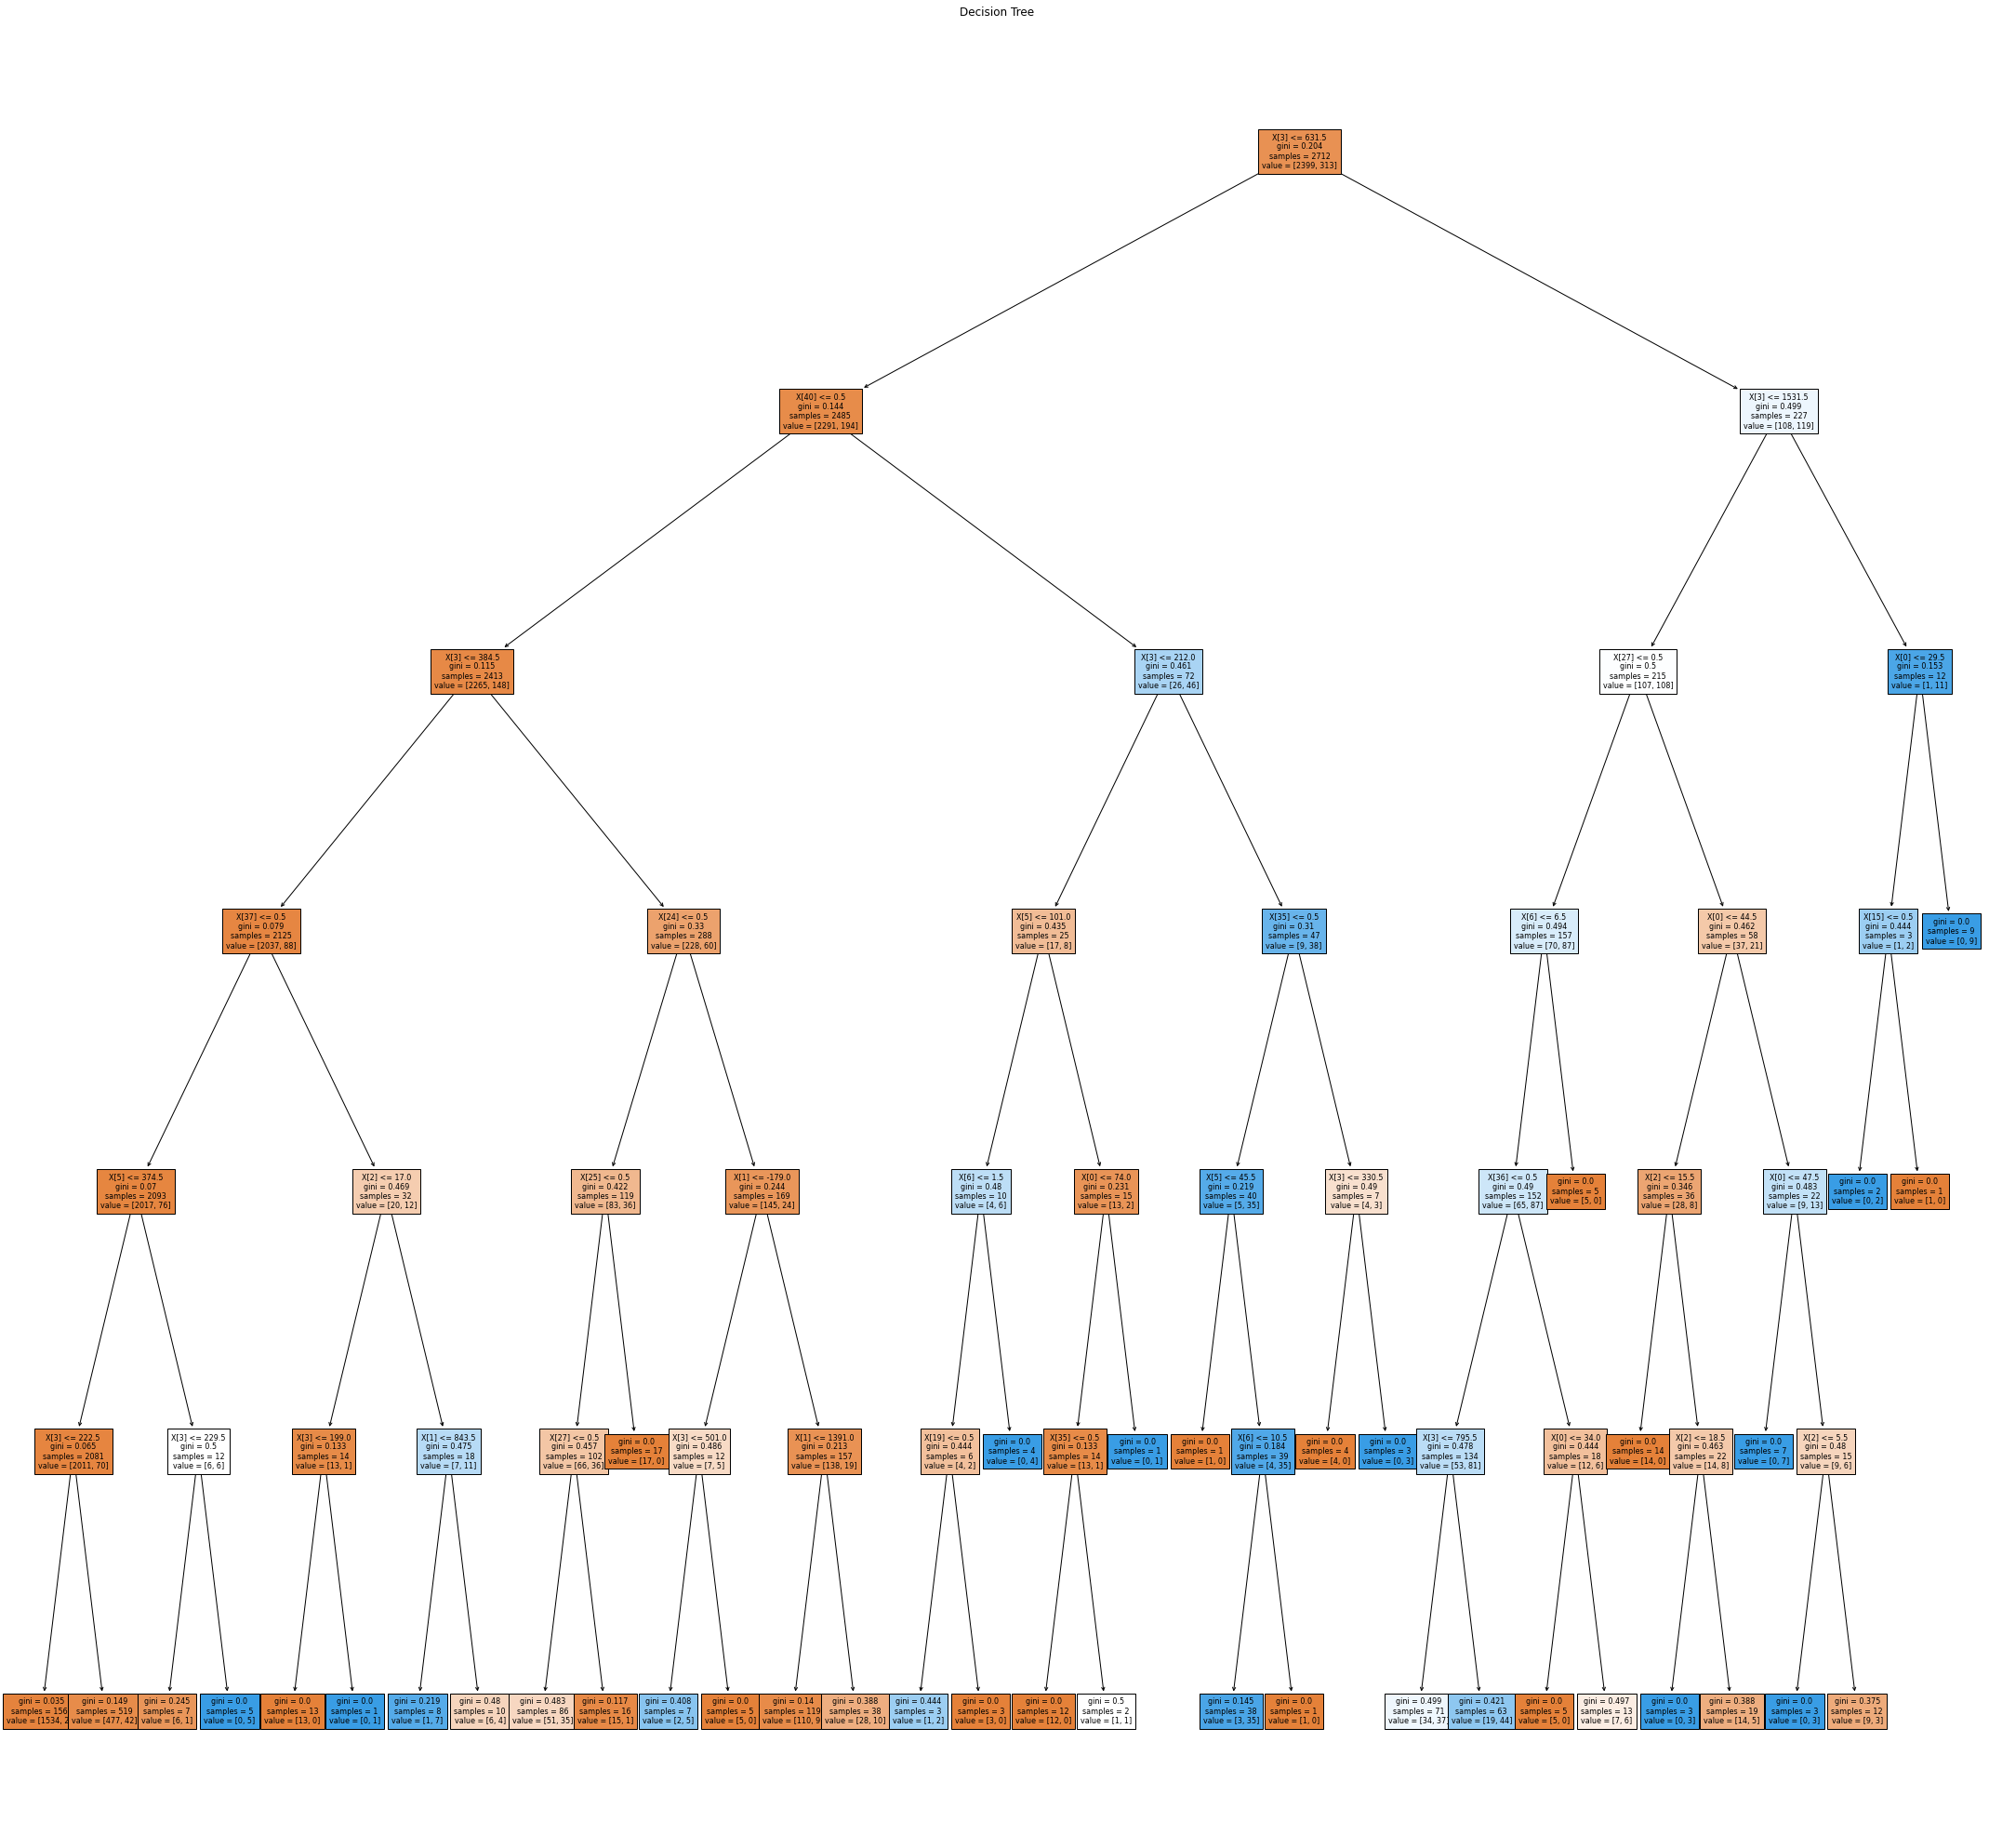

In [35]:
# Rewrite to account for one hot encoded data.
# Takes time to run
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation\
from sklearn import tree
from sklearn.tree import plot_tree

#split dataset in features and target variable
feature_cols = ['balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
X = X_train # Features
y = y_train # Target variable

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

plt.figure(figsize=(38, 36))
plot_tree(clf, filled=True, fontsize=8)
plt.title("Decision Tree")
plt.show()

## XGBoost

# Model-Performance & Improvements

One thing to consider with improving the model is does dropping the outliers improve efficency.

Optional k-fold split on 7 splits

In [36]:
# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# Create variables for each classifier
bagging_classifier = BaggingClassifier(random_state=1, n_jobs=-1)
random_forest_classifier = RandomForestClassifier(random_state=1, n_jobs=-1)
gradient_boosting_classifier = GradientBoostingClassifier(random_state=1)
adaboost_classifier = AdaBoostClassifier(random_state=1)
xgboost_classifier = XGBClassifier(random_state=1, eval_metric="logloss", n_jobs=-1)
decision_tree_classifier = DecisionTreeClassifier(random_state=1)

# Append the classifiers to the models list using the variables
models = []
models.append(("Bagging", bagging_classifier))
models.append(("Random Forest", random_forest_classifier))
models.append(("GradientBoost", gradient_boosting_classifier))
models.append(("Adaboost", adaboost_classifier))
models.append(("XGBoost", xgboost_classifier))
models.append(("DecisionTree", decision_tree_classifier))

In [37]:
def do_model_cv_and_scoring(models, scoring="recall"):
    results = []  # Empty list to store all model's CV scores
    names = []  # Empty list to store name of the models
    score = []
    
    # loop through all models to get the mean cross validated score
    print("\n" "Cross-Validation Performance ({}):" "\n".format(scoring))
    for name, model in models:
        kfold = StratifiedKFold(
            n_splits=7, shuffle=True, random_state=1
        )  # Setting number of splits equal to 7
        cv_result = cross_val_score(
            estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
        )
        results.append(cv_result)
        names.append(name)
        print("{}: {:.2%}".format(name, cv_result.mean()))

    print("\n" "Validation Performance ({}):" "\n".format(scoring))

    for name, model in models:
        model.fit(X_train, y_train)
        prediction=model.predict(X_val)
        if (scoring=="recall"):
            scores = recall_score(y_val, prediction)
        elif(scoring=="precision"):
            scores = precision_score(y_val, prediction)
        else:
            scores = accuracy_score(y_val, prediction)
        score.append(scores)
        print("{}: {:.2%}".format(name, scores))
        
    return results

results=do_model_cv_and_scoring(models, scoring="recall")
results=do_model_cv_and_scoring(models, scoring="precision")
results=do_model_cv_and_scoring(models, scoring="accuracy")


Cross-Validation Performance (recall):

Bagging: 37.04%
Random Forest: 25.86%
GradientBoost: 38.96%
Adaboost: 37.67%
XGBoost: 41.52%
DecisionTree: 41.53%

Validation Performance (recall):

Bagging: 33.65%
Random Forest: 24.04%
GradientBoost: 31.73%
Adaboost: 32.69%
XGBoost: 32.69%
DecisionTree: 43.27%

Cross-Validation Performance (precision):

Bagging: 57.36%
Random Forest: 62.32%
GradientBoost: 61.60%
Adaboost: 57.70%
XGBoost: 56.42%
DecisionTree: 41.95%

Validation Performance (precision):

Bagging: 53.03%
Random Forest: 56.82%
GradientBoost: 55.93%
Adaboost: 50.75%
XGBoost: 50.75%
DecisionTree: 43.27%

Cross-Validation Performance (accuracy):

Bagging: 89.57%
Random Forest: 89.60%
GradientBoost: 90.04%
Adaboost: 89.53%
XGBoost: 89.45%
DecisionTree: 86.25%

Validation Performance (accuracy):

Bagging: 88.94%
Random Forest: 89.16%
GradientBoost: 89.27%
Adaboost: 88.61%
XGBoost: 88.61%
DecisionTree: 86.95%


# Model Comparison

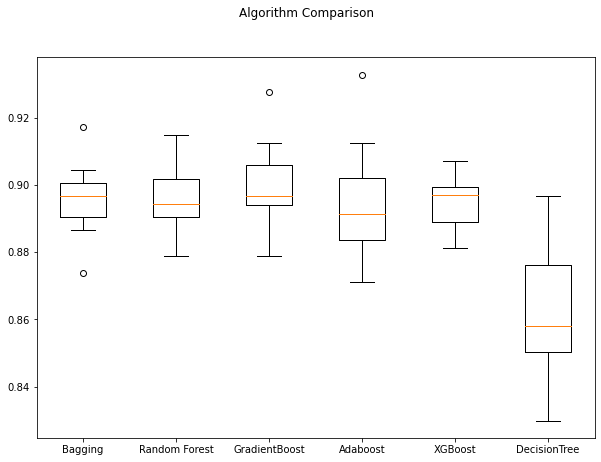

In [38]:
# Plotting boxplots for CV scores of all models defined above
names = ["Bagging", "Random Forest", "GradientBoost", "Adaboost", "XGBoost", "DecisionTree"]

def plot_cv_results(results):
    fig = plt.figure(figsize=(10, 7))
    fig.suptitle("Algorithm Comparison")
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    
plot_cv_results(results)

In [39]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [40]:
for name, model in models:
    print('Training performance of:', name)
    print(model_performance_classification_sklearn(model, X_train, y_train))
    print()

Training performance of: Bagging
   Accuracy    Recall  Precision        F1
0  0.989676  0.916933    0.99308  0.953488

Training performance of: Random Forest
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Training performance of: GradientBoost
   Accuracy    Recall  Precision        F1
0  0.946165  0.613419   0.884793  0.724528

Training performance of: Adaboost
   Accuracy    Recall  Precision        F1
0  0.909292  0.460064   0.651584  0.539326

Training performance of: XGBoost
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Training performance of: DecisionTree
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0



In [41]:
for name, model in models:
    print('Validation performance of:', name)
    print(model_performance_classification_sklearn(model, X_val, y_val))
    print()

Validation performance of: Bagging
   Accuracy    Recall  Precision        F1
0  0.889381  0.336538   0.530303  0.411765

Validation performance of: Random Forest
   Accuracy    Recall  Precision        F1
0  0.891593  0.240385   0.568182  0.337838

Validation performance of: GradientBoost
   Accuracy    Recall  Precision        F1
0  0.892699  0.317308   0.559322  0.404908

Validation performance of: Adaboost
   Accuracy    Recall  Precision        F1
0  0.886062  0.326923   0.507463  0.397661

Validation performance of: XGBoost
   Accuracy    Recall  Precision        F1
0  0.886062  0.326923   0.507463  0.397661

Validation performance of: DecisionTree
   Accuracy    Recall  Precision        F1
0  0.869469  0.432692   0.432692  0.432692



In [42]:
for name, model in models:
    print('Validation performance of:', name)
    print(model_performance_classification_sklearn(model, X_test, y_test))
    print()

Validation performance of: Bagging
   Accuracy    Recall  Precision        F1
0  0.890608  0.336538   0.538462  0.414201

Validation performance of: Random Forest
   Accuracy    Recall  Precision   F1
0  0.900552  0.288462   0.652174  0.4

Validation performance of: GradientBoost
   Accuracy    Recall  Precision        F1
0  0.891713  0.317308       0.55  0.402439

Validation performance of: Adaboost
   Accuracy    Recall  Precision        F1
0  0.890608  0.307692   0.542373  0.392638

Validation performance of: XGBoost
   Accuracy    Recall  Precision       F1
0  0.883978  0.365385   0.493506  0.41989

Validation performance of: DecisionTree
   Accuracy    Recall  Precision        F1
0  0.860773  0.451923   0.405172  0.427273



In [43]:
from sklearn.metrics import (
    plot_confusion_matrix
)

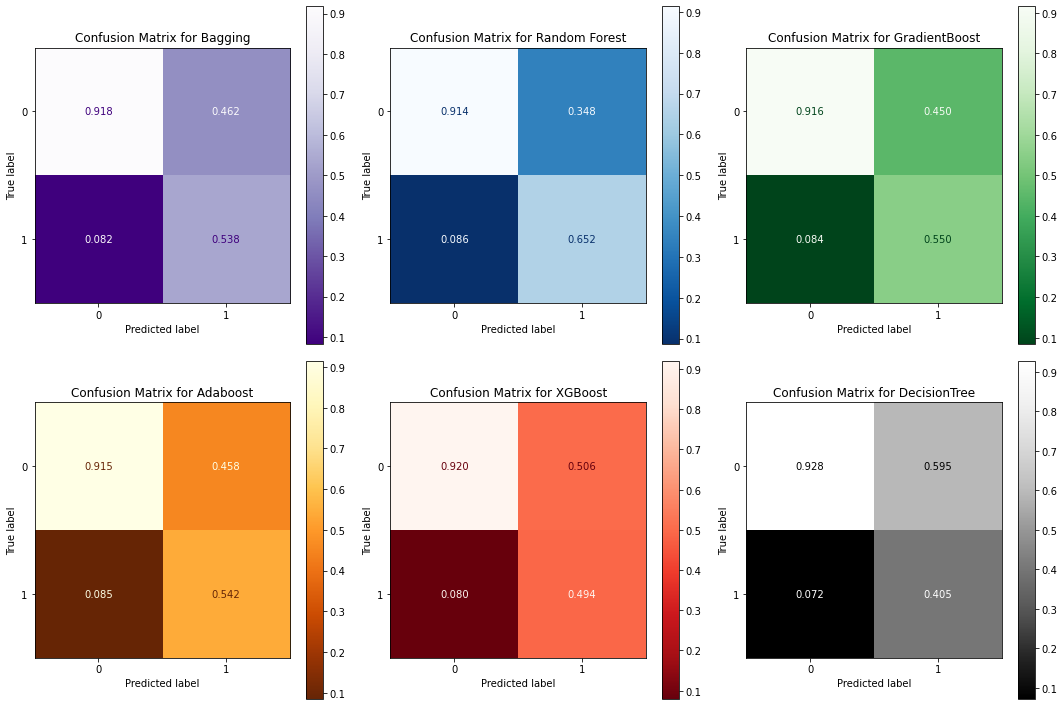

In [44]:
# import matplotlib.pyplot as plt
# cmaps = ['Purples', 'Blues', 'Greens', 'YlOrBr', 'Reds', 'Greys']

# for index, (name, model) in enumerate(models):
#     cmap = cmaps[index % len(cmaps)]
#     plot_confusion_matrix(model, X_test, y_test, cmap=cmap+'_r', normalize='pred', values_format="0.3f")
#     plt.title(f'Confusion Matrix for {name}')
#     plt.show()

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

cmaps = ['Purples', 'Blues', 'Greens', 'YlOrBr', 'Reds', 'Greys']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for index, (name, model) in enumerate(models):
    row, col = index // 3, index % 3
    cmap = cmaps[index % len(cmaps)]
    plot_confusion_matrix(model, X_test, y_test, ax=axes[row, col], cmap=cmap+'_r', normalize='pred', values_format="0.3f")
    axes[row, col].set_title(f'Confusion Matrix for {name}')

plt.tight_layout()
plt.show()


# Importance of Each Feature in the Models

Note: Only 4 models contain the feature_importances_ metric so only those 4 are observed here.

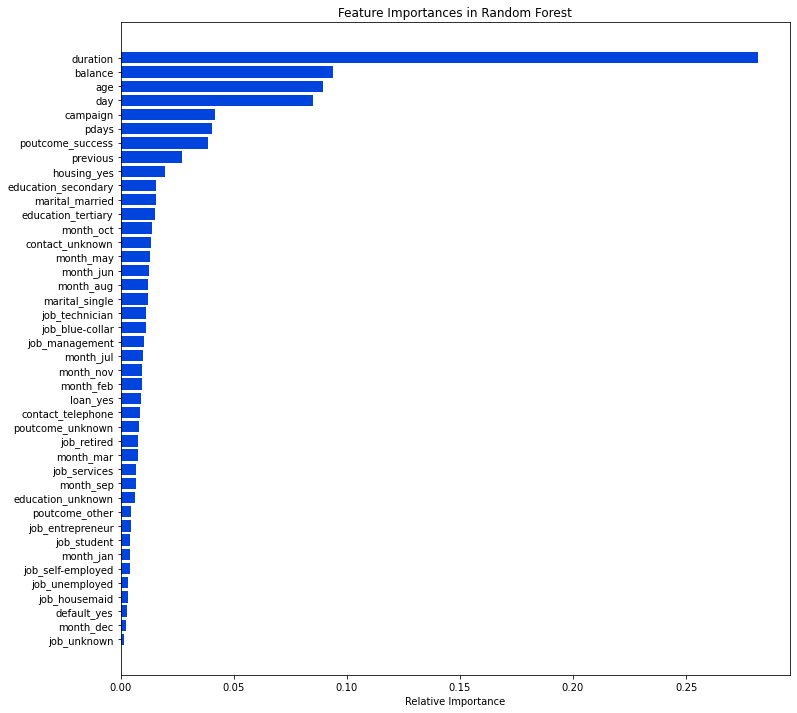

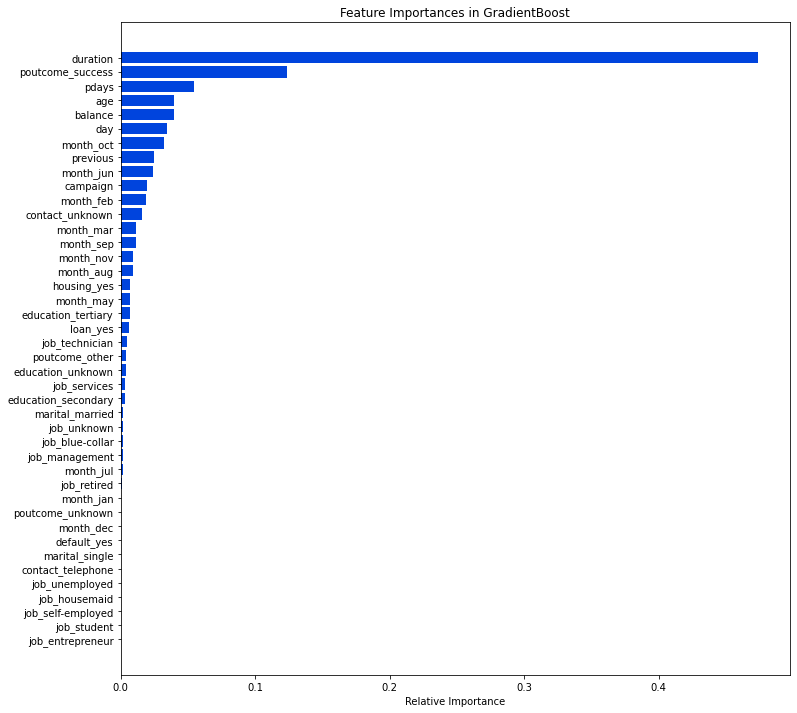

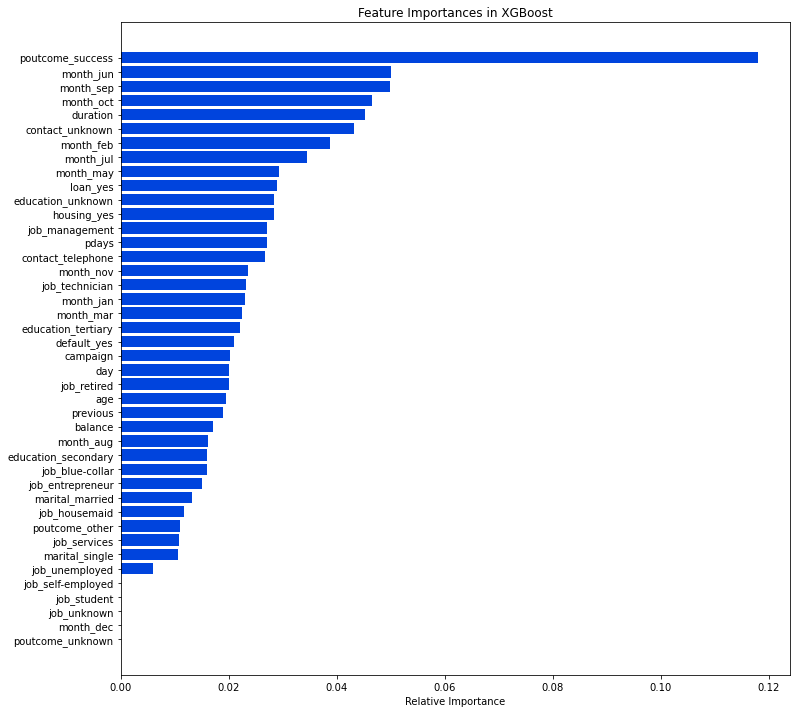

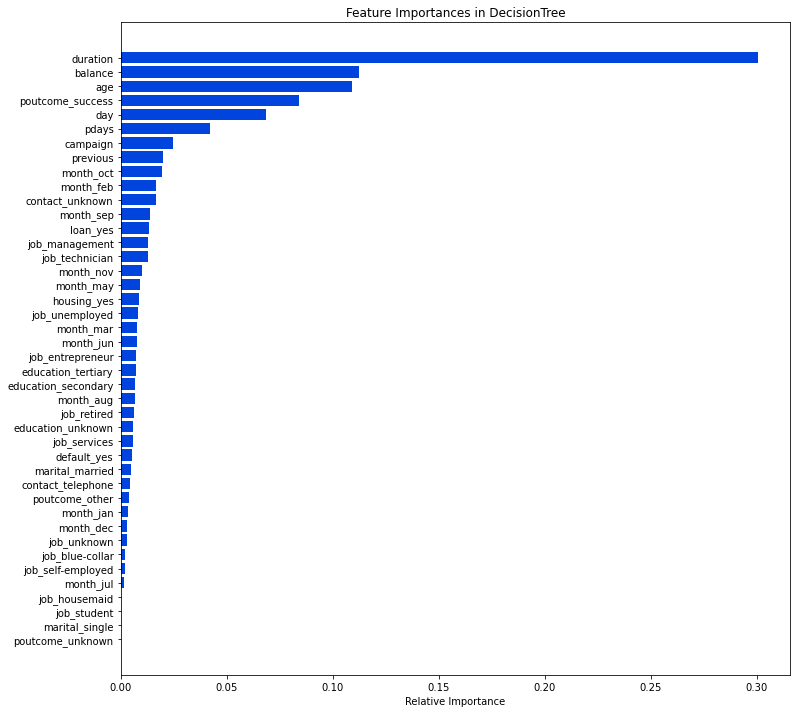

In [45]:
feature_names = X_train.columns

models_with_importances = [model for model in models if model[0] in ["Random Forest", "GradientBoost", "DecisionTree", "XGBoost"]]

for name, model in models_with_importances:
    importances = model.feature_importances_
    indices = np.argsort(importances)
    plt.figure(figsize=(12, 12))
    plt.title(f"Feature Importances in {name}")
    plt.barh(range(len(indices)), importances[indices], color="#0044dd", align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Relative Importance")
    plt.show()

# Conclusion

Our conclusion can center around what we learned, what metrics affected accuracy the most, how k-folds improved performance, which model performed the best, and whether we think precision (wasting money on customers that won't convert) or recall (missing new customers) is more important here, and what customer features were overall most important. We can segway this into a final paragraph talking about actionable things the bank can do to ensure maximum returns on future campaigns, using the features we've learned about.

### Conclusions

# References:

Ensemble methods. Corporate Finance Institute. (2023, November 21). https://corporatefinanceinstitute.com/resources/data-science/ensemble-methods/ 

Brownlee, J. (2020, August 14). A gentle introduction to the gradient boosting algorithm for machine learning. 

MachineLearningMastery.com. https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/ 

Kurama, V. (2021, April 9). A guide to understanding AdaBoost. Paperspace Blog. https://blog.paperspace.com/adaboost-optimizer/ 

GeeksforGeeks. (2023, August 20). Decision tree. GeeksforGeeks. https://www.geeksforgeeks.org/decision-tree/ 

GeeksforGeeks. (2023a, March 31). Gradient boosting in ML. GeeksforGeeks. https://www.geeksforgeeks.org/ml-gradient-boosting/ 

Saini, A. (2023, August 2). Gradient boosting algorithm: A complete guide for beginners. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/ 

Pandian, S. (2023, November 17). K-fold cross validation technique and its essentials. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/ 

What is bagging?. IBM. (n.d.). https://www.ibm.com/topics/bagging 

guest_blog. (2023, March 30). Introduction to XGBoost algorithm in Machine Learning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/ 

Sklearn.ensemble.BaggingClassifier. scikit. (n.d.). https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 

What is Random Forest?. IBM. (n.d.-b). https://www.ibm.com/topics/random-forest

Sklearn.ensemble.gradientboostingclassifier. scikit. (n.d.-b). https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

1.11. ensembles: Gradient boosting, random forests, bagging, voting, stacking. scikit. (n.d.-a). https://scikit-learn.org/stable/modules/ensemble.html#bagging


In [46]:
# from sklearn.preprocessing import OrdinalEncoder
# import seaborn as sns

# import pandas as pd

# import numpy as np

# import matplotlib.pyplot as plt

# import warnings

# import xgboost as xgb


# warnings.filterwarnings("ignore")


# diamonds = sns.load_dataset("diamonds")

# X, y = diamonds.drop("cut", axis=1), diamonds[['cut']]

# # Encode y to numeric
# y_encoded = OrdinalEncoder().fit_transform(y)

# # Extract text features
# cats = X.select_dtypes(exclude=np.number).columns.tolist()

# # Convert to pd.Categorical
# for col in cats:
#    X[col] = X[col].astype('category')

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=1, stratify=y_encoded)

# # Create classification matrices
# dtrain_clf = xgb.DMatrix(X_train, y_train, enable_categorical=True)
# dtest_clf = xgb.DMatrix(X_test, y_test, enable_categorical=True)

# params = {"objective": "multi:softprob", "tree_method": "gpu_hist", "num_class": 5}
# n = 1000

# results = xgb.cv(
#    params, dtrain_clf,
#    num_boost_round=n,
#    nfold=5,
#    metrics=["mlogloss", "auc", "merror"],
# )

# results.keys()

# Index(['train-mlogloss-mean', 'train-mlogloss-std', 'train-auc-mean',

#       'train-auc-std', 'train-merror-mean', 'train-merror-std',

#       'test-mlogloss-mean', 'test-mlogloss-std', 'test-auc-mean',

#       'test-auc-std', 'test-merror-mean', 'test-merror-std'],

#      dtype='object')

# results['test-auc-mean'].max()

# # Train a model using the scikit-learn API
# xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
# xgb_classifier.fit(X_train, y_train)

# # Convert the model to a native API model
# model = xgb_classifier.get_booster()
# print(model)

In [47]:
# import xgboost as xgb
# from sklearn.preprocessing import OrdinalEncoder

# # Encode y to numeric
# y_encoded = OrdinalEncoder().fit_transform(y_train)


# # Train a model using the scikit-learn API
# xgb_classifier = xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', tree_method='hist', eta=0.1, max_depth=3, enable_categorical=True)
# xgb_classifier.fit(X_train, y_train)

# # Convert the model to a native API model
# model = xgb_classifier.get_booster()
# print(model)